## Health Monitoring machine learning model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds=pd.read_csv('Health monitoring.csv')
ds

,SBP,DBP,Pulse,Temperature,Level
0,120,80,80,98,0
1,140,83,75,100,1
2,155,100,92,104,2
3,115,82,79,97,0
4,119,79,85,102,1
...,...,...,...,...,...
144,154,99,83,103,2
145,118,77,73,98,0
146,125,87,79,102,1
147,132,88,78,101,1


In [3]:
ds.shape

(149, 5)

In [4]:
ds.corr()

,SBP,DBP,Pulse,Temperature,Level
SBP,1.000000,0.943880,0.555287,0.253203,0.208731
DBP,0.943880,1.000000,0.518759,0.186894,0.108586
Pulse,0.555287,0.518759,1.000000,0.392804,0.384465
Temperature,0.253203,0.186894,0.392804,1.000000,0.648766
Level,0.208731,0.108586,0.384465,0.648766,1.000000


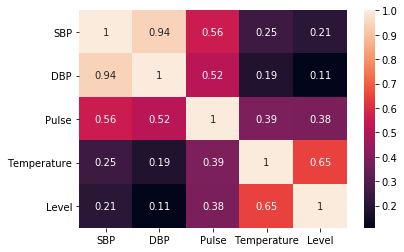

In [5]:
import seaborn as sns
sns.heatmap(ds.corr(),annot=True)

In [6]:
ds.describe()

,SBP,DBP,Pulse,Temperature,Level
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,123.516779,81.261745,75.550336,99.926174,0.993289
std,14.486995,9.752613,5.344151,2.056939,0.850252
min,95.000000,60.000000,60.000000,94.000000,0.000000
25%,117.000000,77.000000,72.000000,98.000000,0.000000
50%,119.000000,80.000000,76.000000,100.000000,1.000000
75%,132.000000,88.000000,79.000000,101.000000,2.000000
max,155.000000,101.000000,92.000000,106.000000,2.000000


In [7]:
ds.isnull().any()

SBP            False
DBP            False
Pulse          False
Temperature    False
Level          False
dtype: bool

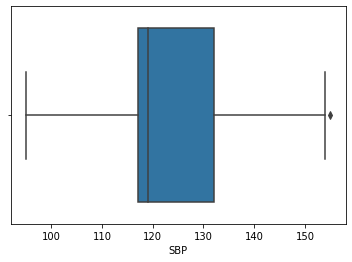

In [8]:
sns.boxplot(ds['SBP'])

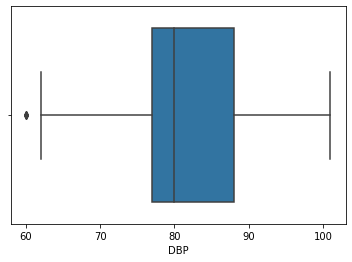

In [9]:
sns.boxplot(ds['DBP'])

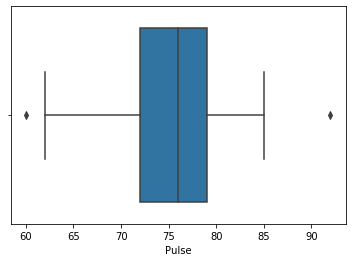

In [10]:
sns.boxplot(ds['Pulse'])

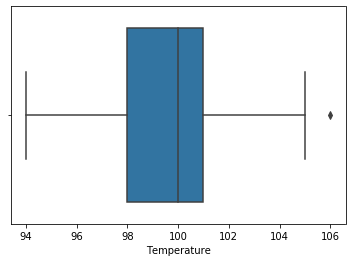

In [11]:
sns.boxplot(ds['Temperature'])

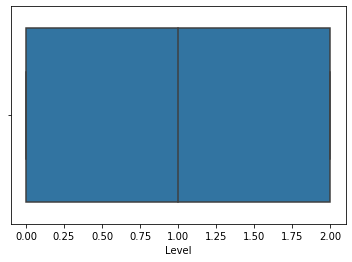

In [12]:
sns.boxplot(ds['Level'])

In [13]:
iqr=ds.quantile(0.75)-ds.quantile(0.25)
iqr

SBP            15.0
DBP            11.0
Pulse           7.0
Temperature     3.0
Level           2.0
dtype: float64

In [14]:
lw=ds.quantile(0.25)-(iqr*1.5)
lw

SBP            94.5
DBP            60.5
Pulse          61.5
Temperature    93.5
Level          -3.0
dtype: float64

In [15]:
uw=ds.quantile(0.75)+(iqr*1.5)
uw

SBP            154.5
DBP            104.5
Pulse           89.5
Temperature    105.5
Level            5.0
dtype: float64

In [16]:
ds['S_new']=np.where(ds['SBP']<=lw[0],ds['SBP'].quantile(0.25),ds['SBP'])
ds['S_new']=np.where(ds['SBP']>=uw[0],ds['SBP'].quantile(0.75),ds['S_new'])
ds

,SBP,DBP,Pulse,Temperature,Level,S_new
0,120,80,80,98,0,120.0
1,140,83,75,100,1,140.0
2,155,100,92,104,2,132.0
3,115,82,79,97,0,115.0
4,119,79,85,102,1,119.0
...,...,...,...,...,...,...
144,154,99,83,103,2,154.0
145,118,77,73,98,0,118.0
146,125,87,79,102,1,125.0
147,132,88,78,101,1,132.0


In [17]:
ds['D_new']=np.where(ds['DBP']<=lw[1],ds['DBP'].quantile(0.25),ds['DBP'])
ds['D_new']=np.where(ds['DBP']>=uw[1],ds['DBP'].quantile(0.75),ds['D_new'])
ds

,SBP,DBP,Pulse,Temperature,Level,S_new,D_new
0,120,80,80,98,0,120.0,80.0
1,140,83,75,100,1,140.0,83.0
2,155,100,92,104,2,132.0,100.0
3,115,82,79,97,0,115.0,82.0
4,119,79,85,102,1,119.0,79.0
...,...,...,...,...,...,...,...
144,154,99,83,103,2,154.0,99.0
145,118,77,73,98,0,118.0,77.0
146,125,87,79,102,1,125.0,87.0
147,132,88,78,101,1,132.0,88.0


In [18]:
ds['P_new']=np.where(ds['Pulse']<=lw[2],ds['Pulse'].quantile(0.25),ds['Pulse'])
ds['P_new']=np.where(ds['Pulse']>=uw[2],ds['Pulse'].quantile(0.75),ds['P_new'])
ds

,SBP,DBP,Pulse,Temperature,Level,S_new,D_new,P_new
0,120,80,80,98,0,120.0,80.0,80.0
1,140,83,75,100,1,140.0,83.0,75.0
2,155,100,92,104,2,132.0,100.0,79.0
3,115,82,79,97,0,115.0,82.0,79.0
4,119,79,85,102,1,119.0,79.0,85.0
...,...,...,...,...,...,...,...,...
144,154,99,83,103,2,154.0,99.0,83.0
145,118,77,73,98,0,118.0,77.0,73.0
146,125,87,79,102,1,125.0,87.0,79.0
147,132,88,78,101,1,132.0,88.0,78.0


In [19]:
ds['T_new']=np.where(ds['Temperature']<=lw[3],ds['Temperature'].quantile(0.25),ds['Temperature'])
ds['T_new']=np.where(ds['Temperature']>=uw[3],ds['Temperature'].quantile(0.75),ds['T_new'])
ds

,SBP,DBP,Pulse,Temperature,Level,S_new,D_new,P_new,T_new
0,120,80,80,98,0,120.0,80.0,80.0,98.0
1,140,83,75,100,1,140.0,83.0,75.0,100.0
2,155,100,92,104,2,132.0,100.0,79.0,104.0
3,115,82,79,97,0,115.0,82.0,79.0,97.0
4,119,79,85,102,1,119.0,79.0,85.0,102.0
...,...,...,...,...,...,...,...,...,...
144,154,99,83,103,2,154.0,99.0,83.0,103.0
145,118,77,73,98,0,118.0,77.0,73.0,98.0
146,125,87,79,102,1,125.0,87.0,79.0,102.0
147,132,88,78,101,1,132.0,88.0,78.0,101.0


In [20]:
ds.describe()

,SBP,DBP,Pulse,Temperature,Level,S_new,D_new,P_new,T_new
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,123.516779,81.261745,75.550336,99.926174,0.993289,123.362416,81.718121,75.543624,99.892617
std,14.486995,9.752613,5.344151,2.056939,0.850252,14.270180,9.120130,5.026260,1.997096
min,95.000000,60.000000,60.000000,94.000000,0.000000,95.000000,62.000000,62.000000,94.000000
25%,117.000000,77.000000,72.000000,98.000000,0.000000,117.000000,77.000000,72.000000,98.000000
50%,119.000000,80.000000,76.000000,100.000000,1.000000,119.000000,80.000000,76.000000,100.000000
75%,132.000000,88.000000,79.000000,101.000000,2.000000,132.000000,88.000000,79.000000,101.000000
max,155.000000,101.000000,92.000000,106.000000,2.000000,154.000000,101.000000,85.000000,105.000000


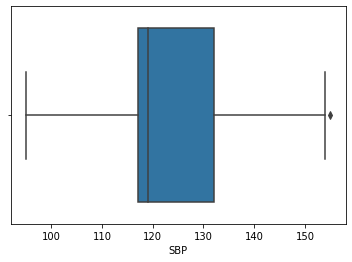

In [21]:
sns.boxplot(ds['SBP'])

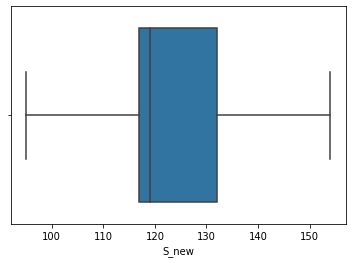

In [22]:
sns.boxplot(ds['S_new'])

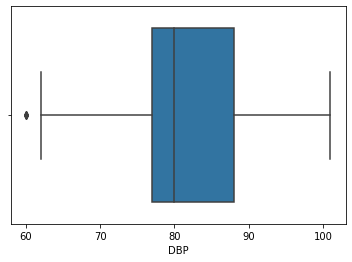

In [23]:
sns.boxplot(ds['DBP'])

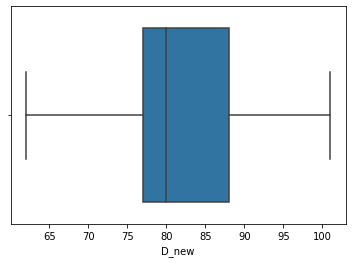

In [24]:
sns.boxplot(ds['D_new'])

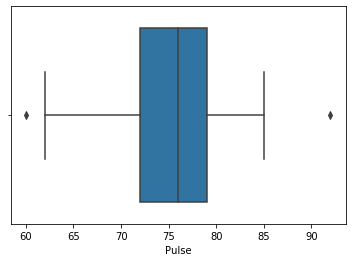

In [25]:
sns.boxplot(ds['Pulse'])

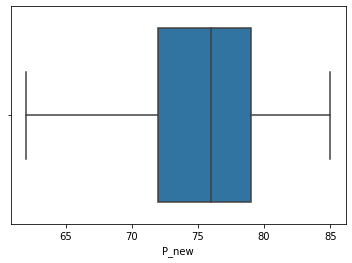

In [26]:
sns.boxplot(ds['P_new'])

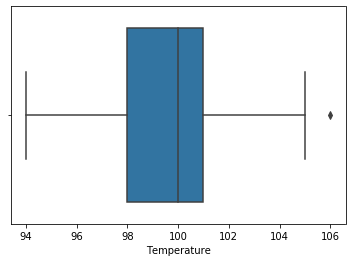

In [27]:
sns.boxplot(ds['Temperature'])

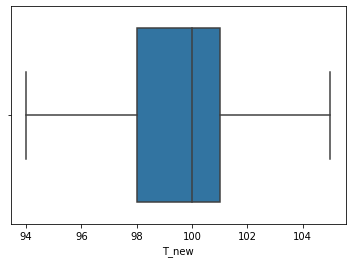

In [28]:
sns.boxplot(ds['T_new'])

In [29]:
ds.describe()

,SBP,DBP,Pulse,Temperature,Level,S_new,D_new,P_new,T_new
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,123.516779,81.261745,75.550336,99.926174,0.993289,123.362416,81.718121,75.543624,99.892617
std,14.486995,9.752613,5.344151,2.056939,0.850252,14.270180,9.120130,5.026260,1.997096
min,95.000000,60.000000,60.000000,94.000000,0.000000,95.000000,62.000000,62.000000,94.000000
25%,117.000000,77.000000,72.000000,98.000000,0.000000,117.000000,77.000000,72.000000,98.000000
50%,119.000000,80.000000,76.000000,100.000000,1.000000,119.000000,80.000000,76.000000,100.000000
75%,132.000000,88.000000,79.000000,101.000000,2.000000,132.000000,88.000000,79.000000,101.000000
max,155.000000,101.000000,92.000000,106.000000,2.000000,154.000000,101.000000,85.000000,105.000000


# The final data after removing outliers

In [30]:
ds

,SBP,DBP,Pulse,Temperature,Level,S_new,D_new,P_new,T_new
0,120,80,80,98,0,120.0,80.0,80.0,98.0
1,140,83,75,100,1,140.0,83.0,75.0,100.0
2,155,100,92,104,2,132.0,100.0,79.0,104.0
3,115,82,79,97,0,115.0,82.0,79.0,97.0
4,119,79,85,102,1,119.0,79.0,85.0,102.0
...,...,...,...,...,...,...,...,...,...
144,154,99,83,103,2,154.0,99.0,83.0,103.0
145,118,77,73,98,0,118.0,77.0,73.0,98.0
146,125,87,79,102,1,125.0,87.0,79.0,102.0
147,132,88,78,101,1,132.0,88.0,78.0,101.0


In [31]:
x_new=ds.iloc[:,5:9].values
x_new

array([[120.,  80.,  80.,  98.],
       [140.,  83.,  75., 100.],
       [132., 100.,  79., 104.],
       [115.,  82.,  79.,  97.],
       [119.,  79.,  85., 102.],
       [ 95.,  65.,  75., 101.],
       [116.,  75.,  70.,  99.],
       [100.,  77.,  79.,  98.],
       [119.,  78.,  68., 100.],
       [110.,  69.,  65., 102.],
       [117.,  73.,  76.,  99.],
       [130.,  88.,  84., 101.],
       [145.,  90.,  82., 104.],
       [118.,  75.,  75.,  99.],
       [114.,  76.,  69.,  98.],
       [105.,  65.,  72., 102.],
       [132.,  89.,  76., 101.],
       [135.,  87.,  76., 100.],
       [140.,  91.,  80., 102.],
       [119.,  78.,  70.,  99.],
       [116.,  77.,  74.,  98.],
       [106.,  68.,  79., 103.],
       [129.,  89.,  82., 100.],
       [126.,  90.,  80., 101.],
       [147.,  95.,  84., 104.],
       [116.,  78.,  70.,  98.],
       [118.,  76.,  68.,  99.],
       [128.,  87.,  80., 100.],
       [130.,  85.,  82., 101.],
       [148.,  92.,  84., 104.],
       [10

In [32]:
y=ds.iloc[:,4].values
y

array([0, 1, 2, 0, 1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 0, 2,
       1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0,
       0, 2, 2, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 0], dtype=int64)

In [33]:
x_new.ndim

2

In [34]:
y.ndim

1

In [35]:
x_new.shape

(149, 4)

In [36]:
y.shape

(149,)

(array([54.,  0.,  0.,  0.,  0., 42.,  0.,  0.,  0., 53.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

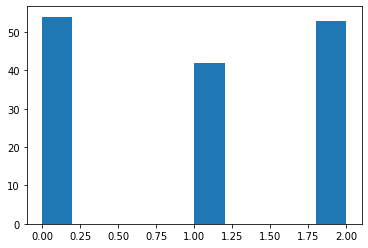

In [37]:
plt.hist(y)

In [38]:
ds['Level'].value_counts()

0    54
2    53
1    42
Name: Level, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_new_train,x_new_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=0)

In [41]:
x_new_train

array([[140.,  99.,  85., 102.],
       [132., 100.,  79., 104.],
       [125.,  87.,  79., 102.],
       [117.,  73.,  76.,  99.],
       [104.,  68.,  79., 101.],
       [154.,  99.,  79., 100.],
       [147.,  94.,  79., 100.],
       [120.,  78.,  69.,  98.],
       [128.,  86.,  64., 101.],
       [104.,  68.,  79., 101.],
       [126.,  85.,  76., 100.],
       [120.,  78.,  71.,  99.],
       [119.,  79.,  70.,  98.],
       [120.,  80.,  76.,  98.],
       [118.,  77.,  73.,  98.],
       [132.,  87.,  77.,  98.],
       [118.,  79.,  76., 100.],
       [147.,  92.,  80.,  99.],
       [127.,  84.,  75., 100.],
       [100.,  65.,  62.,  95.],
       [119.,  80.,  75.,  98.],
       [118.,  76.,  74.,  98.],
       [117.,  80.,  73.,  99.],
       [151.,  95.,  80., 100.],
       [128.,  88.,  79., 101.],
       [118.,  79.,  73.,  99.],
       [126.,  87.,  77., 101.],
       [126.,  88.,  78.,  98.],
       [118.,  75.,  75.,  99.],
       [ 99.,  68.,  66., 102.],
       [11

In [42]:
y_train

array([2, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0,
       0, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 0,
       1], dtype=int64)

In [43]:
x_new_test

array([[ 98.,  64.,  76.,  98.],
       [145., 100.,  75., 100.],
       [126.,  85.,  79.,  99.],
       [100.,  63.,  80., 103.],
       [100.,  77.,  79.,  98.],
       [135.,  89.,  80., 100.],
       [134.,  86.,  78., 100.],
       [117.,  77.,  85., 100.],
       [116.,  80.,  70.,  98.],
       [115.,  78.,  70.,  98.],
       [117.,  79.,  76.,  99.],
       [117.,  78.,  75.,  98.],
       [119.,  78.,  70.,  98.],
       [147.,  95.,  84., 104.],
       [127.,  89.,  80.,  98.],
       [119.,  78.,  74.,  98.],
       [146.,  95.,  81., 100.],
       [128.,  88.,  77.,  99.],
       [132.,  89.,  76., 101.],
       [145.,  92.,  82., 101.],
       [118.,  79.,  76., 101.],
       [119.,  78.,  68., 100.],
       [150.,  96.,  82., 102.],
       [129.,  89.,  82., 100.],
       [120.,  78.,  70.,  99.],
       [120.,  80.,  75., 105.],
       [119.,  78.,  70.,  98.],
       [118.,  76.,  68.,  99.],
       [118.,  79.,  70.,  99.],
       [104.,  67.,  84., 103.],
       [12

In [44]:
y_test

array([2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0], dtype=int64)

In [45]:
x_new_train.shape

(111, 4)

In [46]:
y_train.shape

(111,)

In [47]:
x_new_test.shape

(38, 4)

In [48]:
y_test.shape

(38,)

# Algorithms

#### Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [50]:
lgr=Pipeline([("sc",StandardScaler()),("classifier",LogisticRegression())])
lgr.fit(x_new_train,y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [51]:
y_pred=lgr.predict(x_new_test)
y_pred

array([0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 2, 1, 0], dtype=int64)

In [52]:
y_test

array([2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score
lgrp=accuracy_score(y_test,y_pred)
lgrp

0.8157894736842105

#### Decision trees

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
dt=DecisionTreeRegressor(criterion='mse',random_state=0)
dt.fit(x_new_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [56]:
y_pred=dt.predict(x_new_test)
y_pred

array([2., 2., 1., 2., 2., 1., 1., 0., 0., 0., 0., 0., 0., 2., 1., 0., 2.,
       1., 1., 2., 0., 0., 2., 1., 0., 2., 0., 0., 0., 2., 1., 2., 2., 0.,
       2., 1., 1., 0.])

In [57]:
y_test

array([2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0], dtype=int64)

In [58]:
from sklearn.metrics import accuracy_score
dtp=accuracy_score(y_test,y_pred)
dtp

0.9210526315789473

#### Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rf=RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(x_new_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [61]:
y_pred=rf.predict(x_new_test)
y_pred

array([1.76, 1.98, 1.03, 1.99, 1.42, 1.01, 1.01, 0.76, 0.  , 0.  , 0.02,
       0.  , 0.  , 2.  , 1.05, 0.  , 2.  , 1.02, 1.01, 1.93, 0.55, 0.83,
       2.  , 1.  , 0.01, 1.61, 0.  , 0.  , 0.01, 1.97, 1.  , 1.98, 1.98,
       1.44, 1.64, 1.18, 1.  , 0.  ])

In [62]:
y_test

array([2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0], dtype=int64)

In [63]:
from sklearn.metrics import r2_score
rfp=r2_score(y_test,y_pred)
rfp

0.8549311701081612

#### Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [65]:
nb=Pipeline([("sc",StandardScaler()),("classifier",GaussianNB())])
nb.fit(x_new_train,y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [66]:
y_pred=nb.predict(x_new_test)
y_pred

array([2, 2, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0], dtype=int64)

In [67]:
y_test

array([2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
nbp=accuracy_score(y_test,y_pred)
nbp

0.9736842105263158

#### Nearest Neighbour

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [70]:
nn=Pipeline([("sc",StandardScaler()),("classifier",KNeighborsClassifier(metric='minkowski',p=1))])
nn.fit(x_new_train,y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=1,
                                      weights='uniform'))],
         verbose=False)

In [71]:
y_pred=nn.predict(x_new_test)
y_pred

array([2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 0,
       2, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0], dtype=int64)

In [72]:
y_test

array([2, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 2, 2, 1, 1, 0], dtype=int64)

In [73]:
from sklearn.metrics import accuracy_score
nnp=accuracy_score(y_test,y_pred)
nnp

0.8947368421052632

In [74]:
comp=[lgrp,dtp,rfp,nbp,nnp]
label=['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','Nearest Neighbour']
sl=pd.Series(comp,label)

In [75]:
plt.rcParams['figure.figsize']=(10,5)

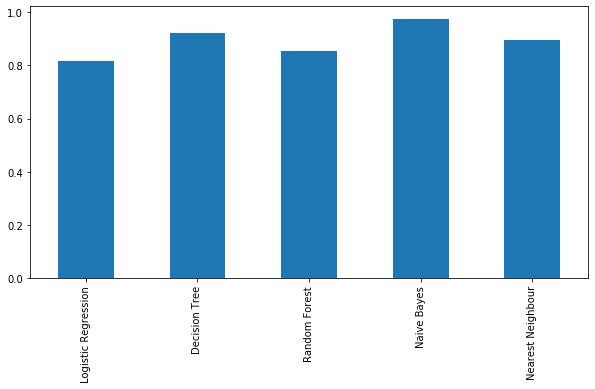

In [76]:
sl.plot.bar()

### Therefore,by seeing the above bar plot we have concluded that naive bayes algorithm would be the best algorithm to predict the Level of a patient by taking the SBP,DBP,Pulse and Temperature of the patient as the required input.

In [77]:
from joblib import dump
dump(nb,'nb.save')

['nb.save']